In [185]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [186]:
df = pd.read_parquet("../data/raw/input_dataset-2.parquet")
pred_df = pd.read_parquet("../data/raw/prediction_input.parquet")
pretension_df = pd.read_csv("../data/raw/bolt_pretension.csv", header=None)

In [187]:
start_cols = set(df)

In [188]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.068018e+06,1.068018e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,1.637421e+03,1.679710e+03,1.784819e+02,1.657813e+02,1.462637e+02,2.257179e+02,2.986768e+02,1.618114e+02,1.454601e-01,4.567642e-01
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,2.007034e+00,4.540256e+00,2.019696e+00,4.113352e+00,2.145015e-01,2.001803e-01,7.708676e-01,3.447038e-01,2.508660e-02,2.421547e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,1.587784e+03,1.608899e+03,1.753436e+02,1.629430e+02,1.457152e+02,2.243099e+02,2.977115e+02,1.608971e+02,5.138796e-02,1.300494e-01
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.636916e+03,1.676754e+03,1.768119e+02,1.632180e+02,1.460956e+02,2.256090e+02,2.980816e+02,1.616467e+02,1.363742e-01,4.458940e-01
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.637458e+03,1.677958e+03,1.783134e+02,1.642139e+02,1.463355e+02,2.257666e+02,2.985405e+02,1.618121e+02,1.467246e-01,4.788169e-01
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.637769e+03,1.681526e+03,1.796520e+02,1.655471e+02,1.464563e+02,2.258674e+02,2.990896e+02,1.620740e+02,1.555545e-01,4.995086e-01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.642896e+03,1.694804e+03,1.834105e+02,1.788814e+02,1.471180e+02,2.260519e+02,3.012224e+02,1.629766e+02,1.355756e+00,5.316383e+01


In [189]:
pred_df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed
count,226364.000000,226364.000000,226364.000000,226364.000000,226364.000000,226364.000000
mean,294.208361,10.234584,91.231999,111.857950,5279.582233,107.965453
std,35.677561,9.399836,9.289475,24.350183,35.705078,2.801870
min,0.000000,-40.267563,1.965172,99.501497,4163.634469,0.891242
25%,300.831073,5.099963,93.006248,100.658816,5261.784806,108.008808
50%,309.430306,8.742080,94.946457,101.350181,5272.711267,108.048707
75%,311.256467,13.761168,95.505315,101.556642,5284.585325,108.118033
max,317.077060,38.713477,97.124322,238.533790,5481.013749,108.224997


In [190]:
pretension_df.drop(pretension_df.columns[[0]], axis=1, inplace=True)
print(pretension_df)

      1
0  1483
1  1437
2  1612
3  1598
4  1629
5  1636


# Seasonal time features

In [191]:
index_series = pd.Series(df.index, index=df.index)
df["seconds_since_start"] = index_series.diff().dt.seconds.cumsum()
df["month"] = index_series.dt.month
df["day_of_month"] = index_series.dt.day
df["day_of_week"] = index_series.dt.weekday

# Mode to binary

In [192]:
df["is_starting"] = df["mode"].replace("operation", 0).replace("start", 1)

## Netto Power: Unit_4_Power - Unit_4_Reactive Power

In [193]:
df["Netto Power"] = df["Unit_4_Power"] - df["Unit_4_Reactive Power"]

# Unit_4_Power / Vane opening

In [194]:
df["Power / vane opening"] = df["Unit_4_Power"] / df["Turbine_Guide Vane Opening"]

# Active_turbine_cumsum (sec)

In [195]:
df["startnr"] = (df["is_starting"]==1).cumsum()
df["seconds_since_last_data"] = pd.Series(df.index, index=df.index).diff().dt.seconds
df["seconds_since_last_start"] = df.groupby("startnr")["seconds_since_last_data"].cumsum()
df.loc[df["is_starting"]==1, "seconds_since_last_start"] = 0

# Turbine Bearing Vibration / turbine speed

In [196]:
# df["turbine_bearing_vib / speed"] = df["turbine_bearing_vib_vrt"] / df["Turbine_Rotational Speed"]

# Power / Drafttube Pressure

In [197]:
df["Power / Drafttube pressure"] = df["Unit_4_Power"] / df["Turbine_Pressure Drafttube"]

<AxesSubplot:xlabel='timepoints'>

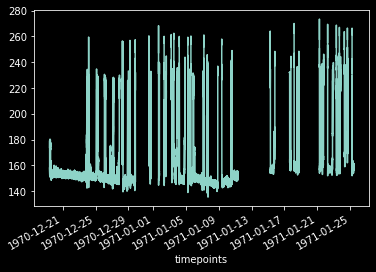

In [198]:
df["Turbine_Pressure Drafttube"].plot()

In [199]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,month,day_of_month,day_of_week,is_starting,Netto Power,Power / vane opening,startnr,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.874087e+06,1.874087e+06,1.874087e+06,1.874087e+06,1.750000e+06,1.749962e+06,1.874087e+06,1.874086e+06,1.874086e+06,1.750000e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,6.032953e+00,1.703422e+01,3.010020e+00,2.896344e-03,2.917649e+02,3.254471e+00,1.848639e+03,1.477682e+00,1.071424e+05,1.927175e+00
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,5.480135e+00,8.288715e+00,2.157108e+00,5.373971e-02,3.032744e+01,1.962569e-01,1.630256e+03,1.513309e+02,1.030651e+05,3.295913e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.832697e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.000000e+00,9.000000e+00,1.000000e+00,0.000000e+00,2.941981e+02,3.273256e+00,2.160000e+02,1.000000e+00,2.134700e+04,1.975358e+00
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.000000e+00,2.000000e+01,3.000000e+00,0.000000e+00,3.004058e+02,3.289016e+00,2.106000e+03,1.000000e+00,6.686100e+04,2.044560e+00
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.200000e+01,2.400000e+01,5.000000e+00,0.000000e+00,3.056284e+02,3.298681e+00,3.187000e+03,1.000000e+00,1.767420e+05,2.086106e+00
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.200000e+01,3.100000e+01,6.000000e+00,1.000000e+00,3.326107e+02,3.405552e+00,5.428000e+03,8.059400e+04,3.965850e+05,2.383355e+00


# Adjust tensile value

In [200]:
tensile_adjusted

,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
timepoints,,,,,,
1970-12-19 09:51:44,115.481390,43.989917,72.247079,3.359944,6.585700,38.848803
1970-12-19 09:51:45,115.477449,43.989528,72.261611,3.366508,6.588478,38.823883
1970-12-19 09:51:46,115.479316,44.003188,72.270504,3.374254,6.583464,38.841318
1970-12-19 09:51:47,115.490184,44.028827,72.270683,3.383179,6.581384,38.843245
1970-12-19 09:51:48,115.494073,44.059017,72.271062,3.378391,6.591746,38.872300
...,...,...,...,...,...,...
1971-01-25 11:06:44,154.386115,67.557822,89.651420,8.276545,11.704071,54.014705
1971-01-25 11:06:45,154.365865,67.546091,89.654301,8.271877,11.711250,54.017029
1971-01-25 11:06:46,154.384133,67.538696,89.656143,8.250028,11.699142,54.002008


In [201]:
tensile_cols = [c for c in df if "Tensile" in c]
tensile_adjusted = df[tensile_cols] - pretension_df[1].values
tensile_adjusted.rename(columns=lambda x: str(x) + "_adj", inplace=True)
# df.loc[:, [c + "_adj" for c in tensile_cols]] = tensile_adjusted.copy()
df = pd.concat([df, tensile_adjusted], axis=1)
df

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,startnr,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,1598.481390,1480.989917,...,0,NaN,NaN,1.507309,115.481390,43.989917,72.247079,3.359944,6.585700,38.848803
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,1598.477449,1480.989528,...,0,1.0,1.0,1.506435,115.477449,43.989528,72.261611,3.366508,6.588478,38.823883
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,1598.479316,1481.003188,...,0,1.0,2.0,1.505561,115.479316,44.003188,72.270504,3.374254,6.583464,38.841318
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,1598.490184,1481.028827,...,0,1.0,3.0,1.504687,115.490184,44.028827,72.270683,3.383179,6.581384,38.843245
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,1598.494073,1481.059017,...,0,1.0,4.0,1.503294,115.494073,44.059017,72.271062,3.378391,6.591746,38.872300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,operation,4.193937,1637.386115,1504.557822,...,5428,1.0,19788.0,1.954791,154.386115,67.557822,89.651420,8.276545,11.704071,54.014705
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,operation,4.193254,1637.365865,1504.546091,...,5428,1.0,19789.0,1.954401,154.365865,67.546091,89.654301,8.271877,11.711250,54.017029
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,operation,4.193261,1637.384133,1504.538696,...,5428,1.0,19790.0,1.954012,154.384133,67.538696,89.656143,8.250028,11.699142,54.002008


In [202]:
list(df)

['Unit_4_Power',
 'Unit_4_Reactive Power',
 'Turbine_Guide Vane Opening',
 'Turbine_Pressure Drafttube',
 'Turbine_Pressure Spiral Casing',
 'Turbine_Rotational Speed',
 'mode',
 'Bolt_1_Steel tmp',
 'Bolt_1_Tensile',
 'Bolt_2_Tensile',
 'Bolt_3_Tensile',
 'Bolt_4_Tensile',
 'Bolt_5_Tensile',
 'Bolt_6_Tensile',
 'Bolt_1_Torsion',
 'Bolt_2_Torsion',
 'Bolt_3_Torsion',
 'Bolt_4_Torsion',
 'Bolt_5_Torsion',
 'Bolt_6_Torsion',
 'lower_bearing_vib_vrt',
 'turbine_bearing_vib_vrt',
 'seconds_since_start',
 'month',
 'day_of_month',
 'day_of_week',
 'is_starting',
 'Netto Power',
 'Power / vane opening',
 'startnr',
 'seconds_since_last_data',
 'seconds_since_last_start',
 'Power / Drafttube pressure',
 'Bolt_1_Tensile_adj',
 'Bolt_2_Tensile_adj',
 'Bolt_3_Tensile_adj',
 'Bolt_4_Tensile_adj',
 'Bolt_5_Tensile_adj',
 'Bolt_6_Tensile_adj']

# Derivatives

In [203]:
# TODO
# df.pct_change() #(Can't run on strings)

# Combine all features

In [204]:
df.drop(columns=["startnr", "mode"], inplace=True)
to_keep = list(set(df) - start_cols)
features_to_keep = list(pred_df) + tensile_cols + to_keep
df = df[df.columns.intersection(features_to_keep)]
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,...,Power / vane opening,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.749962e+06,1.874086e+06,1.874086e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,1.613279e+03,1.490365e+03,1.690256e+03,1.602897e+03,...,3.254471e+00,1.477682e+00,1.071424e+05,1.927175e+00,1.302794e+02,5.336536e+01,7.825576e+01,4.896568e+00,8.421284e+00,4.370974e+01
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,1.063794e+01,6.480423e+00,4.674528e+00,2.264478e+00,...,1.962569e-01,1.513309e+02,1.030651e+05,3.295913e-01,1.063794e+01,6.480423e+00,4.674528e+00,2.264478e+00,2.007034e+00,4.540256e+00
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,1.522557e+03,1.425511e+03,1.665702e+03,1.549427e+03,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.955655e+01,-1.148883e+01,5.370227e+01,-4.857322e+01,-4.121649e+01,-2.710137e+01
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,1.604473e+03,1.484862e+03,1.686002e+03,1.602373e+03,...,3.273256e+00,1.000000e+00,2.134700e+04,1.975358e+00,1.214733e+02,4.786242e+01,7.400229e+01,4.372687e+00,7.915510e+00,4.075375e+01
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,1.611077e+03,1.489436e+03,1.689645e+03,1.603006e+03,...,3.289016e+00,1.000000e+00,6.686100e+04,2.044560e+00,1.280774e+02,5.243605e+01,7.764485e+01,5.005521e+00,8.457668e+00,4.195793e+01
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,1.618607e+03,1.493730e+03,1.692938e+03,1.603348e+03,...,3.298681e+00,1.000000e+00,1.767420e+05,2.086106e+00,1.356071e+02,5.672990e+01,8.093786e+01,5.347662e+00,8.768623e+00,4.552581e+01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,1.640510e+03,1.505455e+03,1.702324e+03,1.608264e+03,...,3.405552e+00,8.059400e+04,3.965850e+05,2.383355e+00,1.575097e+02,6.845494e+01,9.032409e+01,1.026434e+01,1.389574e+01,5.880415e+01


In [205]:
list(df)

['Unit_4_Power',
 'Unit_4_Reactive Power',
 'Turbine_Guide Vane Opening',
 'Turbine_Pressure Drafttube',
 'Turbine_Pressure Spiral Casing',
 'Turbine_Rotational Speed',
 'Bolt_1_Tensile',
 'Bolt_2_Tensile',
 'Bolt_3_Tensile',
 'Bolt_4_Tensile',
 'Bolt_5_Tensile',
 'Bolt_6_Tensile',
 'seconds_since_start',
 'month',
 'day_of_month',
 'day_of_week',
 'is_starting',
 'Netto Power',
 'Power / vane opening',
 'seconds_since_last_data',
 'seconds_since_last_start',
 'Power / Drafttube pressure',
 'Bolt_1_Tensile_adj',
 'Bolt_2_Tensile_adj',
 'Bolt_3_Tensile_adj',
 'Bolt_4_Tensile_adj',
 'Bolt_5_Tensile_adj',
 'Bolt_6_Tensile_adj']

# Export data

In [206]:
df.dropna(inplace=True)
df.to_parquet("../data/structured/general/combined_data.parquet")

/var/folders/23/hkqhb87x6q7700t72nhd3ytw0000gn/T/ipykernel_17637/3652360047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
